### 군집(Clustering)의 목적
    한 클러스터 안의 데이터 포인트끼리는 매우 비슷. 
    다른 클러스터의 데이터 포인터와는 구분되도록 데이터를 나눈다.

In [1]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

In [1]:
import mglearn
%matplotlib inline

### k-평균 알고리즘으로 찾은 클러스터 중심과 클러스터 경계
* k-평균 군집은 가장 간단하며 널리 사용하는 군집 알고리즘
* 학습을 시킨 클러스터 중심의 경계

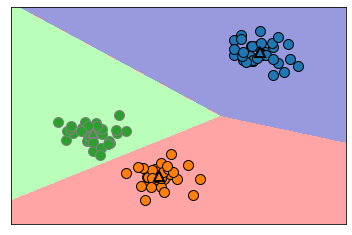

In [3]:
mglearn.plots.plot_kmeans_boundaries()

### k-means 알고리즘 적용

In [4]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)  # 데이터 만들기(2차원 데이터)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘 적용
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1])

In [5]:
print(X.shape, y.shape)
print(X[1:5])
print(X[:, 0][1:5])   # X의 첫번째 열에서 1행부터~4행까지
print(X[:, 1][1:5])   # X의 두번째 열에서 1행부터~4행까지

(200, 2) (200,)
[[ 1.61859642 -0.37982927]
 [-0.02126953  0.27372826]
 [-1.02181041 -0.07543984]
 [ 1.76654633 -0.17069874]]
[ 1.61859642 -0.02126953 -1.02181041  1.76654633]
[-0.37982927  0.27372826 -0.07543984 -0.17069874]


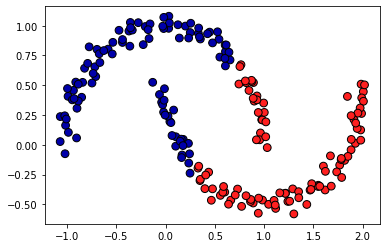

In [7]:
import matplotlib.pyplot as plt

# 클러스터 할당과 클러스터 중심을 표시한다.
col1 = X[: ,0]
col2 = X[: ,1]
plt.scatter(col1, col2, c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')

In [8]:
# 클러스터의 중심
print(kmeans.cluster_centers_)
print(kmeans.cluster_centers_[ : , 0])  # x 좌표
print(kmeans.cluster_centers_[ : , 1])  # y 좌표

[[-0.2003285   0.58035606]
 [ 1.20736718 -0.0825517 ]]
[-0.2003285   1.20736718]
[ 0.58035606 -0.0825517 ]


Text(0, 0.5, 'Feature 1')

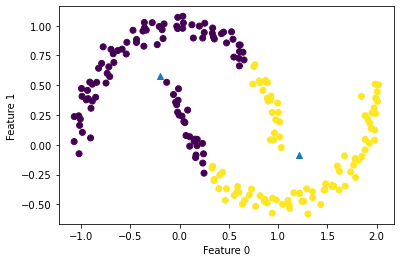

In [9]:
## 그래프 위에 클러스터의 중심 표시
centerX = kmeans.cluster_centers_[ : , 0]
centerY = kmeans.cluster_centers_[ : , 1]

plt.scatter(col1, col2, c=y_pred)
plt.scatter(centerX, centerY, marker="^")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


### 생성된 데이터의 k-means 군집 모델 적용
1. 인위적으로 데이터 생성
2. 군집(Clustering) 모델 생성
3. 학습
4. 예측

In [11]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

In [12]:
# 인위적으로 2차원 데이터 생성
X, y = make_blobs(random_state=1)

# 군집 모델 만들기 (그룹이 3개)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# 레이블 확인
print("클러스터 레이블:\n{}".format(kmeans.labels_))

# 예측
print("예측값")
print(kmeans.predict(X))

클러스터 레이블:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]
예측값
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [14]:
# 데이터 확인
print(X.shape)
print(y.shape)
print(np.unique(y))

(100, 2)
(100,)
[0 1 2]


### 원본 데이터 시각화 

In [ ]:
feature1=X[]

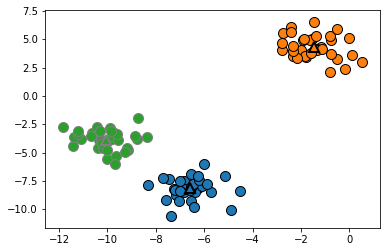

In [16]:
# 각 점 표시
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')

# 클러스터의 중심을 삼각형으로 표시
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1], 
    [0,1,2],
    markers='^', 
    markeredgewidth=2)

### 클러스터 개수 증/감소 시키기

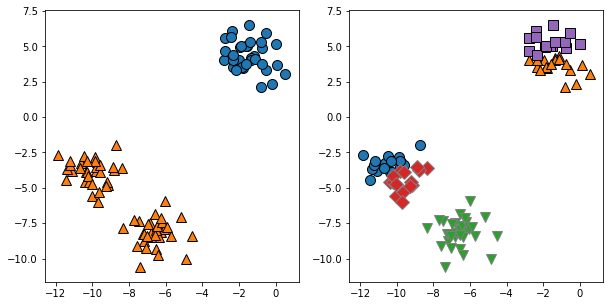

In [17]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

# 두개의 클러스터 중심을 사용.
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[0])

# 다섯개의 클러스터 중심을 사용.
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments =  kmeans.labels_

mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[1])

### 군집 모델(K-means)가 주의점

Text(0, 0.5, '특성 1')

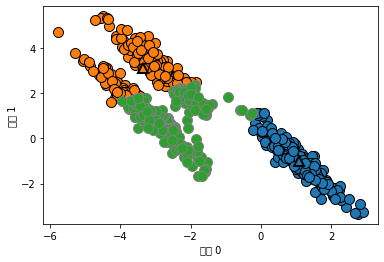

In [20]:
# 무작위로 데이터 생성
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경한다.
transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타낸다.
mglearn.discrete_scatter(X[:,0],
                         X[:,1],
                         kmeans.labels_,
                         markers='o')

mglearn.discrete_scatter(
   kmeans.cluster_centers_[:,0],
   kmeans.cluster_centers_[:,1], 
   [0,1,2],
   markers="^",
   markeredgewidth=2)

plt.xlabel('특성 0')
plt.ylabel('특성 1')